# Live Linear Regression Analysis of Indonesia's Covid-19 real-time cases data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import requests
import json
sns.set()


In [78]:
API = requests.get('https://api.covid19api.com/live/country/indonesia/status/confirmed').json()

df = pd.read_json(json.dumps(API))
df = df.filter(['Date','Deaths','Recovered','Active'])
df=df.drop([16,17,18], axis = 0)

df

,Date,Deaths,Recovered,Active
0,2020-04-13 00:00:00+00:00,373,359,3509
1,2020-04-14 00:00:00+00:00,399,380,3778
2,2020-04-15 00:00:00+00:00,459,426,3954
3,2020-04-16 00:00:00+00:00,498,548,4470
4,2020-04-17 00:00:00+00:00,496,548,4472
5,2020-04-18 00:00:00+00:00,520,607,4796
6,2020-04-19 00:00:00+00:00,535,631,5082
7,2020-04-20 00:00:00+00:00,582,686,5307
8,2020-04-21 00:00:00+00:00,590,747,5423
9,2020-04-22 00:00:00+00:00,616,842,5677


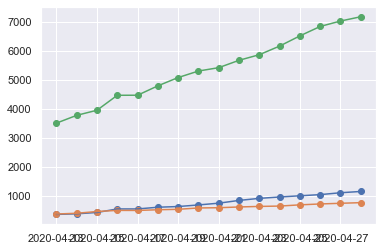

In [80]:
plt.plot(df['Date'],df['Recovered'])
plt.plot(df['Date'],df['Deaths'])
plt.plot(df['Date'],df['Active'])
plt.scatter(df['Date'],df['Recovered'])
plt.scatter(df['Date'],df['Deaths'])
plt.scatter(df['Date'],df['Active'])
plt.show()


In [54]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


D:\New folder\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Active   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           8.17e-12
Time:                        20:38:04   Log-Likelihood:                -140.56
No. Observations:                  19   AIC:                             285.1
Df Residuals:                      17   BIC:                             287.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3062.2258    199.294     15.365      0.000    2641.751    3482.700
Recovered      3.0119      0.185     16.306      0.000       2.622       3.402
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.616
Skew:                           0.128   Prob(JB):                        0.735
Kurtosis:                       2.156   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

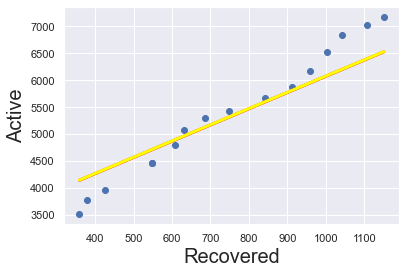

In [92]:
y = df['Active']
x1 = df['Recovered']
plt.scatter(x1,y)

yhat_no = 3062.2258 + 3.0119*x1
yhat_yes = 3065.2377 + 3.0119*x1

fig = plt.plot(x1,yhat_no, lw= 3, c='Red')
fig = plt.plot(x1,yhat_yes, lw= 3, c ='Yellow')

plt.xlabel('Recovered', fontsize = 20)
plt.ylabel('Active',fontsize = 20)

plt.show()

D:\New folder\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     670.1
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           3.18e-13
Time:                        22:08:06   Log-Likelihood:                -67.481
No. Observations:                  16   AIC:                             139.0
Df Residuals:                      14   BIC:                             140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        244.9553     13.638     17.962      0.000     215.706     274.205
Recovered      0.4475      0.017     25.885      0.000       0.410       0.485
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.393
Skew:                          -0.331   Prob(JB):                        0.822
Kurtosis:                       2.612   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

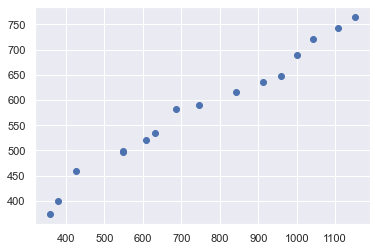

In [90]:
y = df['Deaths']
x1 = df['Recovered']
plt.scatter(x1,y)

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()



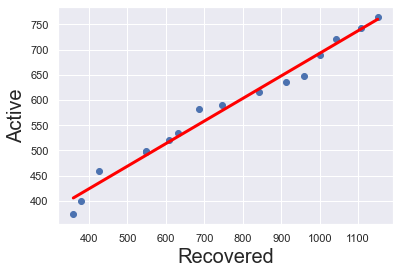

In [94]:
y = df['Deaths']
x1 = df['Recovered']
plt.scatter(x1,y)

yhat_no = 244.9553 + 0.4475*x1
# yhat_yes = 3065.2377 + 3.0119*x1

fig = plt.plot(x1,yhat_no, lw= 3, c='Red')
# fig = plt.plot(x1,yhat_yes, lw= 3, c ='Yellow')

plt.xlabel('Recovered', fontsize = 20)
plt.ylabel('Active',fontsize = 20)

plt.show()